<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Figures detection


<br>


📈Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw

In [ ]:
!pip install yfinance
!pip install mpl_finance

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 46.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rcParams['figure.figsize'] = [20, 8]

# Import the data

In [ ]:
# Import stock prices from Yahoo Finance
df = yf.download("GOOG", start="2010-01-01")

# Create a Date column to plot the Candlestick later (Not mandatory if you don't want to plot the candlestick)
df["Date"] = pd.to_datetime(df.index)
df["Date"] = df["Date"].apply(mpl_dates.date2num)


# Rename columns
df.columns = ["open", "high", "low", "close", "adj close", "volume", "date"]
df.index.name = "time"

df["Candle way"] = -1
df.loc[(df["open"] - df["close"]) < 0, "Candle way"] = 1
df["amplitude"] = np.abs(df["close"] - df["open"])


df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume,date,Candle way,amplitude
time,,,,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927065,733776.0,-1,0.099640
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031925,733777.0,-1,1.589050
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,733778.0,-1,8.767151
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685,733779.0,-1,7.621429
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9484016,733780.0,1,4.991302
...,...,...,...,...,...,...,...,...,...
2022-02-28,2665.689941,2712.810059,2656.504883,2697.820068,2697.820068,1483800,738214.0,1,32.130127
2022-03-01,2689.600098,2722.219971,2667.570068,2683.360107,2683.360107,1232000,738215.0,-1,6.239990
2022-03-02,2692.165039,2712.310059,2668.649902,2695.030029,2695.030029,1198300,738216.0,1,2.864990


# Bullish engulfing

In [ ]:
df["Bullish Engulfing"] = np.nan

df.loc[
       # 5 consequtive decreasing candlestick and Today increase
       (df["Candle way"].shift(5) == -1) &\
       (df["Candle way"].shift(4) == -1) &\
       (df["Candle way"].shift(3) == -1) &\
       (df["Candle way"].shift(2) == -1) &\
       (df["Candle way"].shift(1) == -1) &\
       (df["Candle way"] == 1) &\
      

       # Close of the last decreasing candlestick = Open of today increase candlestick
       (df["close"].shift(1) < df["open"]*(1+0.5/100)) &\
       (df["close"].shift(1) > df["open"]*(1-0.5/100)) &\


       # Last decreaing candlestick is less strong than the Today increasing candlestick
       (df["amplitude"].shift(1)*1.5 < df["amplitude"]), "Bullish Engulfing"] = 1


In [ ]:
df["Bullish Engulfing"].dropna()


time
2010-03-01    1.0
2012-01-27    1.0
2013-06-28    1.0
2013-07-30    1.0
2013-08-19    1.0
2015-05-04    1.0
2016-06-23    1.0
2017-04-12    1.0
2018-01-02    1.0
2018-11-15    1.0
Name: Bullish Engulfing, dtype: float64

# Verification

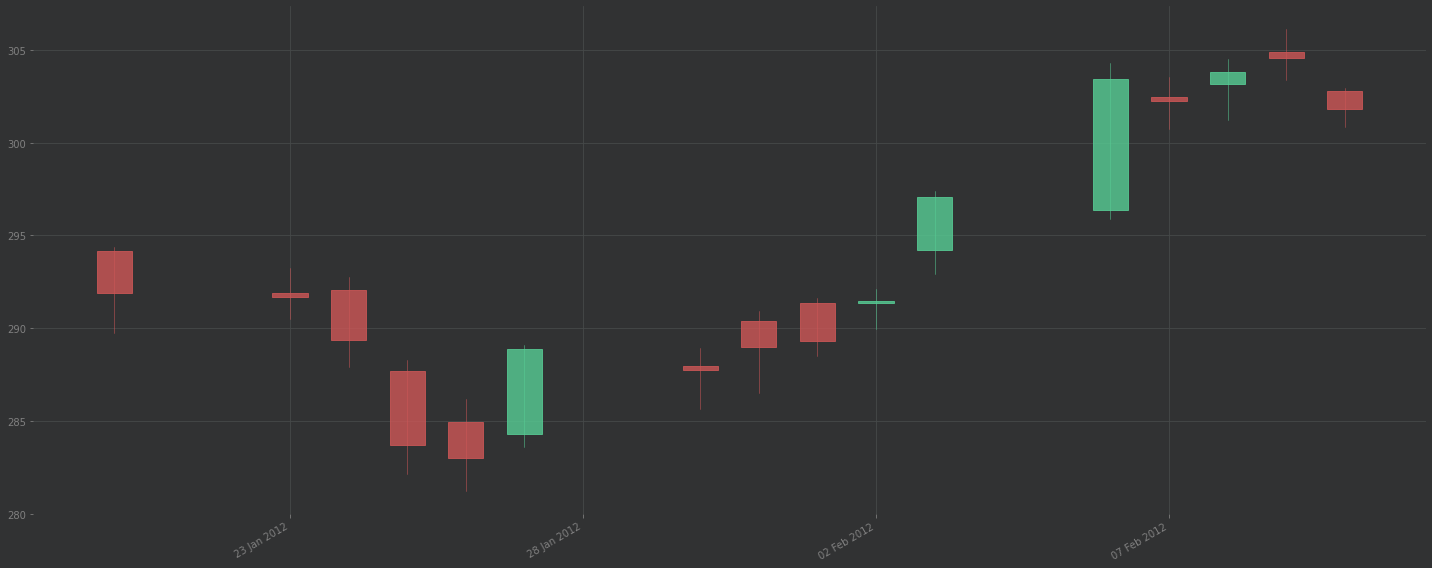

In [ ]:
df_bis = df.loc["2012-01-20":"2012-02-10"]

# Initialize the graph
fig, ax = plt.subplots()

# Plot the candlestick
candlestick_ohlc(ax,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Put date as the x axis
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()
plt.close()

# Bearish Engulfing

In [ ]:
df["Bearish Engulfing"] = np.nan

df.loc[
       # 5 consequtive increasing candlestick and Today decrease
       (df["Candle way"].shift(5) == 1) &\
       (df["Candle way"].shift(4) == 1) &\
       (df["Candle way"].shift(3) == 1) &\
       (df["Candle way"].shift(2) == 1) &\
       (df["Candle way"].shift(1) == 1) &\
       (df["Candle way"] == -1) &\

       # Close of the last increasing candlestick = Open of today decrease candlestick
       (df["close"].shift(1) < df["open"]*(1+0.5/100)) &\
       (df["close"].shift(1) > df["open"]*(1-0.5/100)) &\

       # Last increaing candlestick is less strong than the Today decreasing candlestick
       (df["amplitude"].shift(1) * 1.5< df["amplitude"]), "Bearish Engulfing"] = -1

In [ ]:
df["Bearish Engulfing"].dropna()

time
2015-03-06   -1.0
2015-07-23   -1.0
2015-11-09   -1.0
2017-05-31   -1.0
2018-02-22   -1.0
2019-12-11   -1.0
2020-02-20   -1.0
2020-12-09   -1.0
2021-07-15   -1.0
2021-07-27   -1.0
2021-08-26   -1.0
2021-12-28   -1.0
Name: Bearish Engulfing, dtype: float64

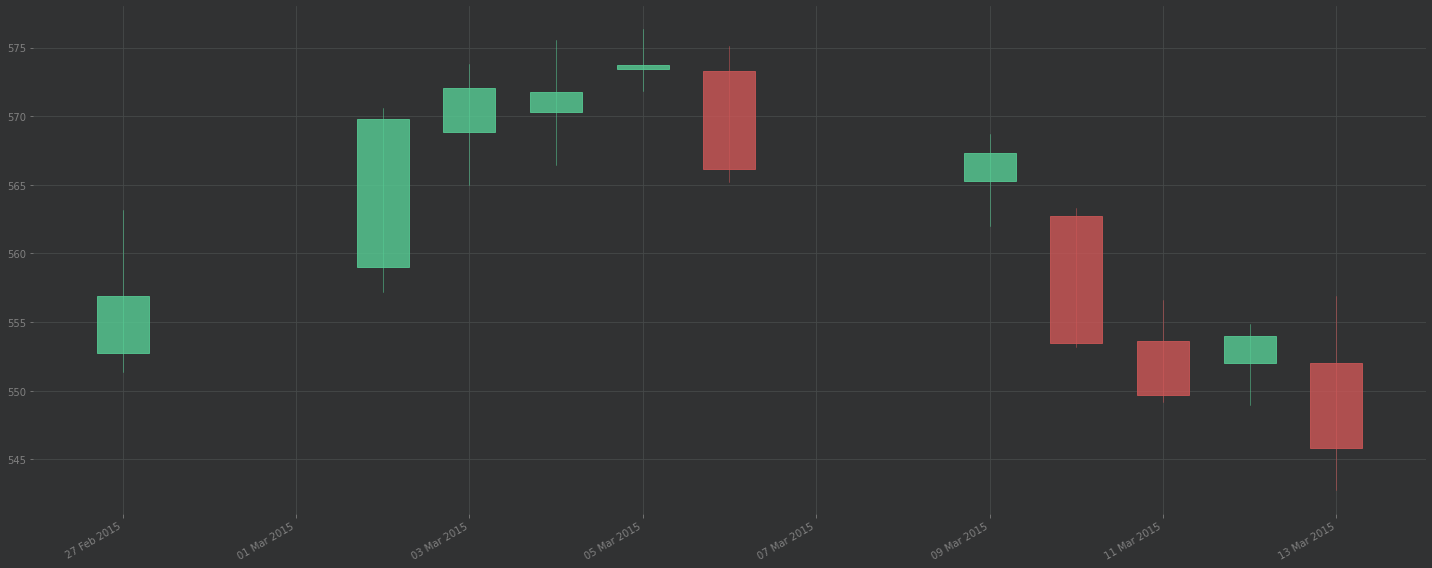

In [ ]:
df_bis = df.loc["2015-02-27":"2015-03-15"]

# Initialize the graph
fig, ax = plt.subplots()

# Plot the candlestick
candlestick_ohlc(ax,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Put date as the x axis
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Backtest

In [ ]:
df["signal"] = df["Bullish Engulfing"].fillna(value=0) + df["Bearish Engulfing"].fillna(value=0)
df["signal"].dropna()

time
2010-01-04    0.0
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    0.0
2010-01-08    0.0
             ... 
2022-02-28    0.0
2022-03-01    0.0
2022-03-02    0.0
2022-03-03    0.0
2022-03-04    0.0
Name: signal, Length: 3064, dtype: float64

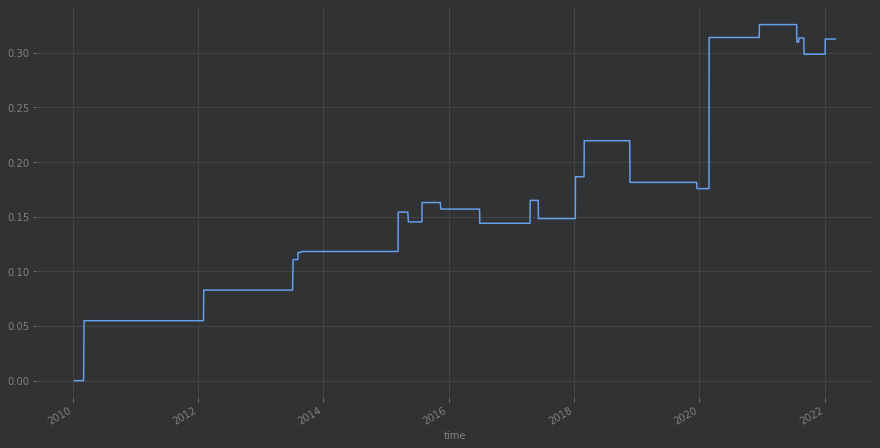

In [ ]:
duration = 5

# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
#df["return"] = df["signal"].shift(1) * df["pct"].shift(0)
df["return"] = df["signal"].shift(2) * (df["pct"].shift(0) + df["pct"].shift(1))
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))


df["return"].cumsum().plot(figsize=(15,8))

# Automatisation

In [ ]:
def engulfing(symbol, spread=0.00, duration=5):
  # Import stock prices from Yahoo Finance
  df = yf.download(symbol, start="2010-01-01")

  # Rename columns
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  df["Candle way"] = -1
  df.loc[(df["open"] - df["close"]) < 0, "Candle way"] = 1
  df["amplitude"] = np.abs(df["close"] - df["open"])


  df["Bullish Engulfing"] = np.nan

  df.loc[
      # 5 consequtive decreasing candlestick and Today increase
      (df["Candle way"].shift(5) == -1) &\
      (df["Candle way"].shift(4) == -1) &\
      (df["Candle way"].shift(3) == -1) &\
      (df["Candle way"].shift(2) == -1) &\
      (df["Candle way"].shift(1) == -1) &\
      (df["Candle way"] == 1) &\

      # Close of the last decreasing candlestick = Open of today increase candlestick
      (df["close"].shift(1) < df["open"]*(1+0.5/100)) &\
      (df["close"].shift(1) > df["open"]*(1-0.5/100)) &\

      # Last decreaing candlestick is less strong than the Today increasing candlestick
      (df["amplitude"].shift(1) * 1.5< df["amplitude"]), "Bullish Engulfing"] = 1


  df["Bearish Engulfing"] = np.nan

  df.loc[
      # 5 consequtive decreasing candlestick and Today increase
      (df["Candle way"].shift(5) == 1) &\
      (df["Candle way"].shift(4) == 1) &\
      (df["Candle way"].shift(3) == 1) &\
      (df["Candle way"].shift(2) == 1) &\
      (df["Candle way"].shift(1) == 1) &\
      (df["Candle way"] == -1) &\

      # Close of the last decreasing candlestick = Open of today increase candlestick
      (df["close"].shift(1) < df["open"]*(1+0.5/100)) &\
      (df["close"].shift(1) > df["open"]*(1-0.5/100)) &\

      # Last decreaing candlestick is less strong than the Today increasing candlestick
      (df["amplitude"].shift(1) * 1.5< df["amplitude"]), "Bearish Engulfing"] = -1

  df["signal"] = df["Bullish Engulfing"].fillna(value=0) + df["Bearish Engulfing"].fillna(value=0)

  # Compute the percentage of variation of the asset
  df["pct"] = df["close"].pct_change(1)

  # Compute the return of the strategy
  df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))

  return df["return"]

[*********************100%***********************]  1 of 1 completed


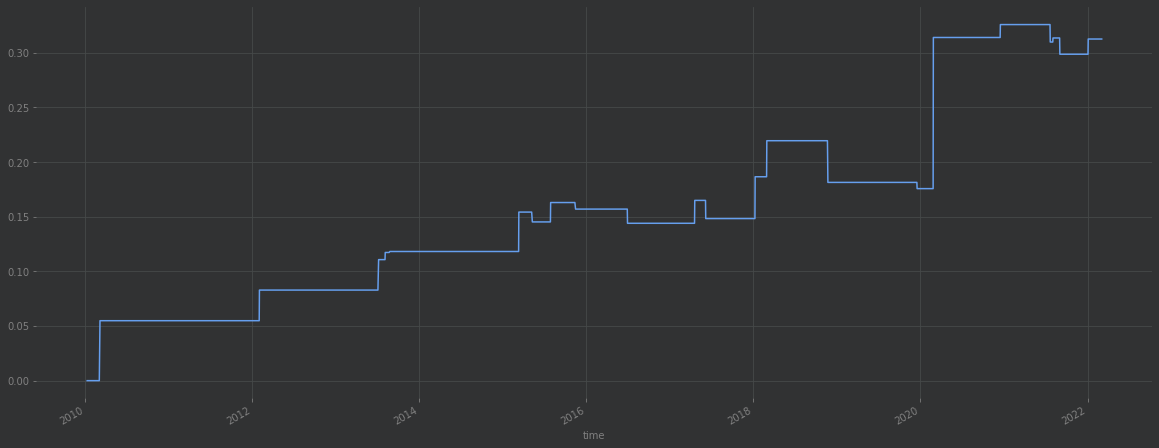

In [ ]:
engulfing("GOOG").cumsum().plot()

[*********************100%***********************]  1 of 1 completed


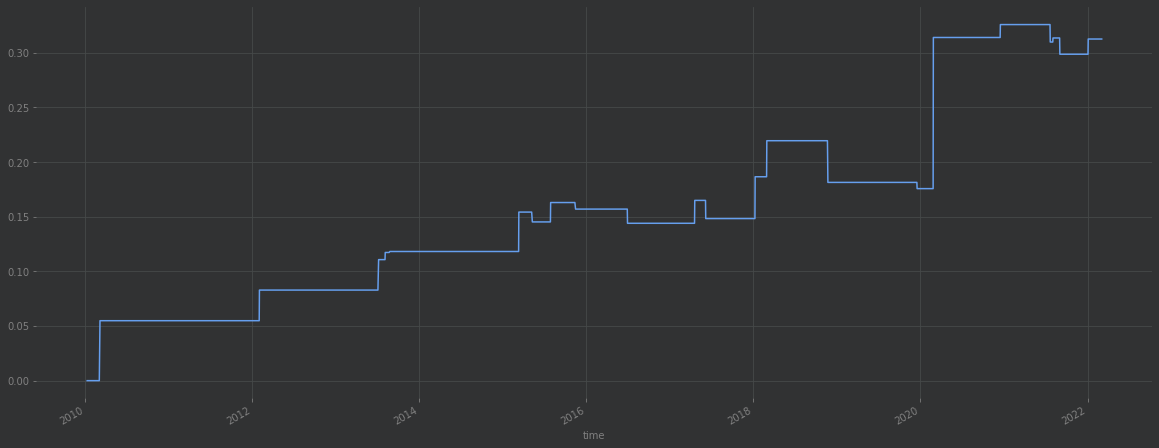

In [ ]:
engulfing("GOOG").cumsum().plot()